In [59]:
import pandas as pd

df = pd.read_csv('/Users/imseonho/Downloads/tcc_ceds_music 3.csv')
df.head()
print(df.shape)

(28372, 31)


In [60]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download([
     "names",
     "stopwords",
     "state_union",
    "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
 ])
 
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package names to /Users/imseonho/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/imseonho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/imseonho/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/imseonho/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/imseonho/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/imseonho/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/imseo

In [61]:
parsedData=df[['release_date', 'lyrics']]
print(parsedData)
result=[]
result.extend(parsedData['lyrics'].values.tolist())

       release_date                                             lyrics
0              1950  hold time feel break feel untrue convince spea...
1              1950  believe drop rain fall grow believe darkest ni...
2              1950  sweetheart send letter goodbye secret feel bet...
3              1950  kiss lips want stroll charm mambo chacha merin...
4              1950  till darling till matter know till dream live ...
...             ...                                                ...
28367          2019  cause fuck leave scar tick tock clock come kno...
28368          2019  minks things chain ring braclets yap fame come...
28369          2019  get ban get ban stick crack relax plan attack ...
28370          2019  check check yeah yeah hear thing call switch g...
28371          2019  remix killer alive remix thriller trap bitch s...

[28372 rows x 2 columns]


In [62]:
sia_result = []
for i in range(len(parsedData)):
    result=[]
    result.extend(parsedData.loc[i]['lyrics'])
    sia.polarity_scores(parsedData.loc[i]['lyrics'])
    sia_result.append(sia.polarity_scores(parsedData.loc[i]['lyrics']))
    
parsedData.insert(loc=1, column='sentiment', value=sia_result)

In [108]:

print(parsedData)
parsedData.to_csv('Lyrics Sentimental Analysis Result.csv')

       release_date                                          sentiment  \
0              1950  {'neg': 0.233, 'neu': 0.467, 'pos': 0.3, 'comp...   
1              1950  {'neg': 0.259, 'neu': 0.591, 'pos': 0.15, 'com...   
2              1950  {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...   
3              1950  {'neg': 0.04, 'neu': 0.458, 'pos': 0.502, 'com...   
4              1950  {'neg': 0.134, 'neu': 0.494, 'pos': 0.372, 'co...   
...             ...                                                ...   
28367          2019  {'neg': 0.228, 'neu': 0.685, 'pos': 0.087, 'co...   
28368          2019  {'neg': 0.242, 'neu': 0.539, 'pos': 0.219, 'co...   
28369          2019  {'neg': 0.19, 'neu': 0.634, 'pos': 0.176, 'com...   
28370          2019  {'neg': 0.068, 'neu': 0.706, 'pos': 0.226, 'co...   
28371          2019  {'neg': 0.508, 'neu': 0.382, 'pos': 0.109, 'co...   

                                                  lyrics  
0      hold time feel break feel untrue convince spe

In [114]:
import statistics
import numpy as np

sentiment_of_year = []
#print(year)
condition = (parsedData['release_date']==1985)
tmp = parsedData.loc[condition]
#print(tmp['sentiment'].values)
for row in tmp['sentiment'].values:
    sentiment_of_year.append(row['compound'])
    
print(statistics.mean(sentiment_of_year))

sentiment_analysis_results = pd.DataFrame(data=np.array([(1985, statistics.mean(sentiment_of_year))]), columns=['year', 'average'])

index=1

for year in range(1986, 2016): #2016
    sentiment_of_year = []
    print(year)
    condition = (parsedData['release_date']==year)
    tmp = parsedData.loc[condition]
    #print(tmp['sentiment'].values)
    for row in tmp['sentiment'].values:
        #print(row['compound'])
        sentiment_of_year.append(row['compound'])
    
    print(statistics.mean(sentiment_of_year))
    sentiment_analysis_results.loc[index] = [year] + [statistics.mean(sentiment_of_year)]
    index=index+1
    #print(tmp['sentiment'].split("\'compound\' : ")[1])
    #average = tmp['sentiment'].get('compound')
    #print(average)

0.16872923832923833
1986
0.2307019396551724
1987
0.1811016091954023
1988
0.17147772511848342
1989
0.190598623853211
1990
0.10218203883495146
1991
0.146527634194831
1992
0.1380720472440945
1993
0.14253030927835053
1994
0.11871634408602151
1995
0.057147532467532465
1996
0.13056456310679612
1997
0.11387593052109181
1998
0.0945990291262136
1999
0.16672457627118645
2000
0.15474125326370758
2001
0.08667467811158798
2002
0.06510578158458244
2003
0.12217510638297872
2004
0.06863423799582463
2005
0.08066454545454545
2006
0.13711195445920304
2007
0.12141277056277057
2008
0.051442857142857144
2009
0.053094472361809045
2010
0.07284425837320574
2011
0.08090357815442561
2012
0.07125442176870748
2013
0.11274178571428571
2014
0.08025158286778399
2015
0.002174878444084278


In [115]:
print(sentiment_analysis_results)

      year   average
0   1985.0  0.168729
1   1986.0  0.230702
2   1987.0  0.181102
3   1988.0  0.171478
4   1989.0  0.190599
5   1990.0  0.102182
6   1991.0  0.146528
7   1992.0  0.138072
8   1993.0  0.142530
9   1994.0  0.118716
10  1995.0  0.057148
11  1996.0  0.130565
12  1997.0  0.113876
13  1998.0  0.094599
14  1999.0  0.166725
15  2000.0  0.154741
16  2001.0  0.086675
17  2002.0  0.065106
18  2003.0  0.122175
19  2004.0  0.068634
20  2005.0  0.080665
21  2006.0  0.137112
22  2007.0  0.121413
23  2008.0  0.051443
24  2009.0  0.053094
25  2010.0  0.072844
26  2011.0  0.080904
27  2012.0  0.071254
28  2013.0  0.112742
29  2014.0  0.080252
30  2015.0  0.002175


In [116]:
f = pd.read_csv('/Users/imseonho/bigdatatermproject/Preprocessed United States Suicide Data.csv')
f['percentage']=f['suicide_no']/f['population'] * 100 
print(f)

    Unnamed: 0  year  suicide_no  population  percentage
0            0  1985       29446   220723000    0.013341
1            1  1986       30892   222953000    0.013856
2            2  1987       30783   225148000    0.013672
3            3  1988       30388   227353000    0.013366
4            4  1989       30218   229487000    0.013168
5            5  1990       30895   229952200    0.013435
6            6  1991       30790   232955000    0.013217
7            7  1992       30471   235565600    0.012935
8            8  1993       31084   238092300    0.013055
9            9  1994       31123   240614100    0.012935
10          10  1995       31272   243164200    0.012860
11          11  1996       30879   245997800    0.012553
12          12  1997       30517   248486400    0.012281
13          13  1998       30558   251332500    0.012158
14          14  1999       29183   253748671    0.011501
15          15  2000       29343   262246108    0.011189
16          16  2001       3060

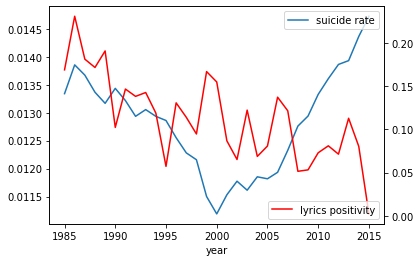

In [131]:
import matplotlib.pyplot as plt

# gca stands for 'get current axis'
ax = plt.gca()

f.plot(kind='line',x='year',y='percentage',ax=ax, label='suicide rate')
ax.legend(loc='upper right')


ax2 = ax.twinx()

sentiment_analysis_results.plot(kind='line',x='year',y='average', color='red', ax=ax2, label='lyrics positivity')
ax2.legend(loc='lower right')


plt.show()

In [125]:
merge_outer = pd.merge(f, sentiment_analysis_results, how='outer', on='year')
print(merge_outer)

merge_outer.to_csv('Merged Analysis Results.csv')

    Unnamed: 0  year  suicide_no  population  percentage   average
0            0  1985       29446   220723000    0.013341  0.168729
1            1  1986       30892   222953000    0.013856  0.230702
2            2  1987       30783   225148000    0.013672  0.181102
3            3  1988       30388   227353000    0.013366  0.171478
4            4  1989       30218   229487000    0.013168  0.190599
5            5  1990       30895   229952200    0.013435  0.102182
6            6  1991       30790   232955000    0.013217  0.146528
7            7  1992       30471   235565600    0.012935  0.138072
8            8  1993       31084   238092300    0.013055  0.142530
9            9  1994       31123   240614100    0.012935  0.118716
10          10  1995       31272   243164200    0.012860  0.057148
11          11  1996       30879   245997800    0.012553  0.130565
12          12  1997       30517   248486400    0.012281  0.113876
13          13  1998       30558   251332500    0.012158  0.09

In [52]:
ff = pd.read_csv('/Users/imseonho/Downloads/youtube-charts-top-songs-us-weekly-2021-12-09.csv')

print(ff)

    Rank  Previous Rank                                         Track Name  \
0      1            NaN                      Heart & Soul / Alligator Walk   
1      2            2.0                                      Super Gremlin   
2      3           65.0                                              Woman   
3      4            1.0  Who Want Smoke?? (feat. G Herbo, 릴 더크 & 21 Sav...   
4      5            5.0                    All I Want For Christmas Is You   
..   ...            ...                                                ...   
95    96           68.0                                 You Are The Reason   
96    97           69.0               Love Me (feat. Drake(드레이크) & FUTURE)   
97    98            NaN                   Sinister (feat. Lil Wayne(릴 웨인))   
98    99           66.0                                         Let Her Go   
99   100            NaN                                Male Fantasy (Live)   

                  Artist Names  Weeks on Chart    Views Weekly 